## 4.2 - Systems of Equations 
**Assignment - Coupled Harmonic Oscillators**

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

Rest positions of masses at static equillibrium:

In [ ]:
k = [1, 2, 3, 4]
K = np.array([[-k[0]-k[1], k[1], 0],
              [k[1], -k[1]-k[2], k[2]],
              [0, k[2], -k[2]-k[3]]])
L = [1, 1, 1, 1]
L_w = 4
b = np.array([[-k[0]*L[0]+k[1]*L[1]],
              [-k[1]*L[1]+k[2]*L[2]],
              [-k[2]*L[2]+k[3]*(L[3] - L_w)]])

x = np.linalg.inv(K) @ b
x


array([[3.88],
       [6.32],
       [8.28]])

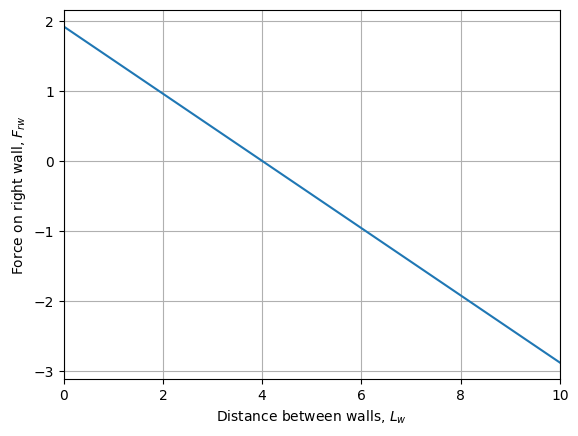

In [31]:
k = [1, 2, 3, 4]
K = np.array([[-k[0]-k[1], k[1], 0],
              [k[1], -k[1]-k[2], k[2]],
              [0, k[2], -k[2]-k[3]]])
L = [1, 1, 1, 1]
L_w = np.linspace(0,10,100)
b_func = lambda j: np.array([[-k[0]*L[0]+k[1]*L[1]],
                [-k[1]*L[1]+k[2]*L[2]],
                [-k[2]*L[2]+k[3]*(L[3] - j)]])

x3Save = np.empty(len(L_w))
F_rw_save = np.empty(len(L_w))

for i,j in enumerate(L_w):
    b = b_func(j)
    x = np.linalg.inv(K) @ b
    x3Save[i] = x[2][0]
    F_rw = -k[3]*(j - x[2] - L[3])
    F_rw_save[i] = F_rw[0]



plt.plot(L_w, F_rw_save)
plt.xlabel('Distance between walls, $L_w$')
plt.ylabel('Force on right wall, $F_{rw}$')
plt.xlim((0,10))
plt.grid()
plt.show()

$L_w = 4$ is a critical value here, where there is zero force as the springs are not compressed or stretched. Beyond this the force becomes negative as the spring are stretched, instead of compressed.

Verify results with theory (law of equivalent springs):

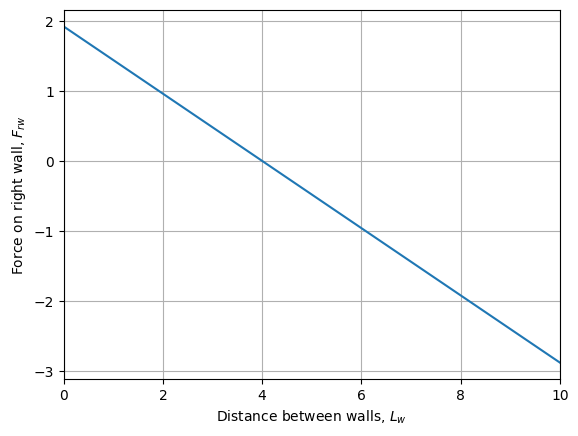

In [39]:
k0 = 1/((1/k[0])+(1/k[1])+(1/k[2])+(1/k[3]))
L0 = L[0]+L[1]+L[2]+L[3]
L_w = np.linspace(0,10,100)
F_rw_ver = -k0*(L_w - L0)
plt.plot(L_w, F_rw_ver)
plt.xlabel('Distance between walls, $L_w$')
plt.ylabel('Force on right wall, $F_{rw}$')
plt.xlim((0,10))
plt.grid()
plt.show()